# 1. Introduction
For this project i have to explore a dataset. I have chosen the Titanic dataset.
After observing the dataset and from some knowledge from history i am interested to explore the following research questions:
- Which gender is more likely to survive?
- Which social class is more likely to survive?
- Which age group is more likely to survive?


# 2. Report and libraries 
I am using pandas library along with numpy to do analysis and process data. Matplotlib.pyplot and seaborn will be used for the visualizations. The answer to the critical research questions and some observations are added in the markdown boxes.

In [45]:
#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [123]:
def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

# 3. Read CSV into dataframe

In [46]:
# Read csv into Pandas Dataframe and store in dataset variable
data = pd.read_csv('titanic_data.csv')
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. Data Wrangling / Cleaning
In this section I'll pbserve different proerties of data, types, find missing values and remove the missing values, remove some unnecessary columns that will not be used in my analysis to improve performance
## 4.1 Investigating Dataset and finding missing / incomplete data

In [47]:
# print out information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above report we see that Age has 714 rows non-null and others are null, Embarked has 889 rows non null and others are null, Cabin has 204 rows non null and others are null. Cabin will be of no use in my analysis and I'll remove Cabin column to improve performance. So for the purpose of analysis I'll only clean the columns Age and Embarked and remove the null values.

## 4.2 Missing Ages
I'll fill the null values of Age with the mean of age grouped by Sex and PClass

In [48]:
nanAge = data[data['Age'].isnull()]
avgAge = data.groupby(['Sex','Pclass'])['Age'].mean()
print(avgAge)
def removeNanAge(row):
    if pd.isnull(row['Age']):
        return avgAge[row['Sex'],row['Pclass']]
    else:
        return row['Age']

data['Age'] = data.apply(remove_na_ages, axis=1)
print(data.info())

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Now we observe that All the rows in the Age column have non null values.

## 4.3 Missing embarkation ports
In order to populate the missing embarked ports I need to first determine if the people with the missing information may have been travelling with others.

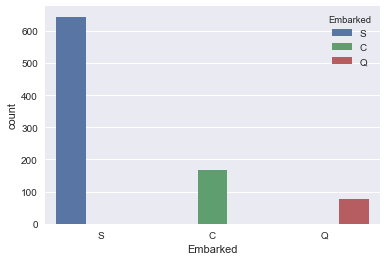

In [49]:
embarked = data[~data['Embarked'].isnull()]
embarked['Embarked']
sns.countplot(x="Embarked",  hue="Embarked", data=data)

From the above figure we observe that most of the passengers Embarked from S or Southhampton. We will use this S to remove the null values from Embarked column

In [50]:
nullEMB = data[data['Embarked'].isnull()]
nullEMB

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [51]:
# search by ticket number and cabin
data[(data['Embarked'].notnull()) & ((data['Ticket'] == '113572') | (data['Cabin'] == 'B28'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


We have found no records where Embarked is non null and ticket is the same as 113572 or cabin is sames as B28. So we are making assumption that these two passensers Embarked from Southhampton or S as we see from above chart most of the passengers Embarked from S.

In [52]:
data['Embarked'].fillna('S',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Now we observe that all rows for both Age and Embarked columns are non null. So we are done with cleaning stage. We'll not be cleaning Cabin as it is going to be removed.

## 4.4 Remove redundant columns to analysis
Cabin, Name and Ticket columns will not be needed to answer the research questions i have pre selected I am going to remove those columns to reduce memory and improve performance.

In [53]:
# dropping columns Cabin, Name and Ticket
data = data.drop(['Cabin','Name','Ticket'], axis=1)
print(data.shape)
data.info()

(891, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


Now we observe that our data doesn't have the columns Cabin,Name and Ticket

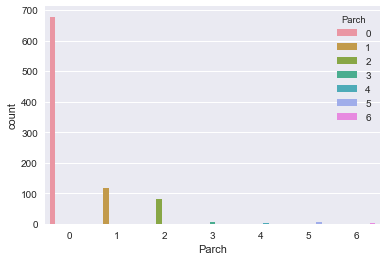

In [56]:
sns.countplot(x = 'Parch',hue = 'Parch',data = data)

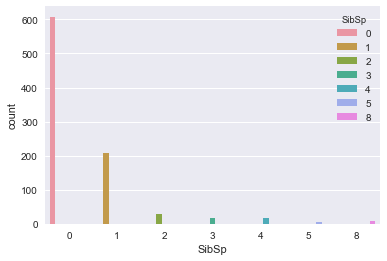

In [57]:
sns.countplot(x = 'SibSp',hue = 'SibSp',data = data)

## 4.5 Mapping data
To make the data interpretation more intuitive we do some mapping in some columns as following:
- Survived - changed numeric 0 and 1 values to boolean (1 = True, 0 = False)
- Pclass - changed to meaningful social status as per the mapping (1 - Upper Class, 2 - Middle Class, 3 - Lower Class)
- Embarked - Changed with the full name of the port (C = Cherbourg; Q = Queenstown; S = Southampton)

A new column Size is added by adding Parch and SibSp columns to denote the size of the family

In [58]:
def mapping(data):
    data['Survived'] = data['Survived'].map({0: False, 1: True})

    data['Pclass'] = data['Pclass'].map({1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})
    data['Embarked'] = data['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'})
    data['Size'] = data['SibSp'] + data['Parch']
    return data

data = mapping(data)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Size
0,1,False,Lower Class,male,22.0,1,0,7.2500,Southampton,1
1,2,True,Upper Class,female,38.0,1,0,71.2833,Cherbourg,1
2,3,True,Lower Class,female,26.0,0,0,7.9250,Southampton,0
3,4,True,Upper Class,female,35.0,1,0,53.1000,Southampton,1
4,5,False,Lower Class,male,35.0,0,0,8.0500,Southampton,0


## 4.6 Grouping / Binning Ages
To make the ages easier to analyse I thought it would be a good idea to group / bin the ages. This way we can compare groups of ages instead of individual ages.

In [63]:
maxAge = data['Age'].max()
print(maxAge)
minAge = data['Age'].min()
print(minAge)

80.0
0.42


In [64]:
ageGroups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['ageGroups'] = pd.cut(data['Age'], range(0, 81, 10), right=False, labels=ageGroups)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Size,ageGroups
0,1,False,Lower Class,male,22.0,1,0,7.2500,Southampton,1,20-29
1,2,True,Upper Class,female,38.0,1,0,71.2833,Cherbourg,1,30-39
2,3,True,Lower Class,female,26.0,0,0,7.9250,Southampton,0,20-29
3,4,True,Upper Class,female,35.0,1,0,53.1000,Southampton,1,30-39
4,5,False,Lower Class,male,35.0,0,0,8.0500,Southampton,0,30-39


# 5. Analysis of data
## 5.1 Number of Survivors
Before trying to determine the characteristics of a passenger that would make them more likely to survive, the number of survivors in the sample should be compared to the actual number of survivors. Based on the information provided by the source of the dataset (Kaggle) there were 2224 passengers and 722 survivors.

In [66]:
totalPassengers = 2224
totalDied = 1502
totalSurvived = totalPassengers - totalDied 

samplePasengers = len(data)
sampleSurvivors = len(data[data['Survived'] ==True])
sampleDies = samplePasengers - sampleSurvivors


print("Ratio of total survived {}".format(totalSurvived/totalPassengers))
print("Ratio of sample survived {}".format(sampleSurvivors/samplePasengers))

Ratio of total survived 0.32464028776978415
Ratio of sample survived 0.3838383838383838


We observe that the ratio of the survived in the total and sample data is very close. So we can say that the sample data is a good representative of the total dataset

## 5.2 Which gender is more likely to survive?

### Hypothesis
The hypothesis for this question is that the gender does impact the chances of survival

H0 = Gender has no impact on survivability

HA = Gender does impact the chances of survivabily

### Total Survivors by Gender

In [67]:
table = pd.crosstab(data['Survived'],data['Sex'])
print(table)

Sex       female  male
Survived              
False         81   468
True         233   109


### Ratio of survivors by Gender

In [68]:
print(data.groupby('Sex').Survived.mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


So we observe that female has higher percentage of survival

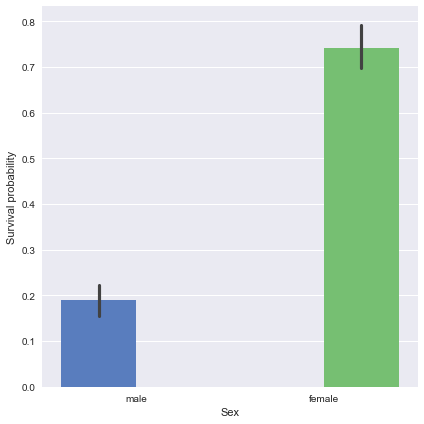

In [74]:
g = sns.factorplot(x="Sex", y="Survived", hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability")

From the above chart we see that the female has survival probability of 0.742 and the male has a survival probability of 0.18. So we can concluse that the female gender is more likely to survive.

In [81]:
# Hypothesis test to find whether we have to accept or reject the null hypothesis
table = pd.crosstab([data['Survived']], data['Sex'])
print(table)
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print("Chi square test {}".format(chi2))
print("P value {}".format(p))

Sex       female  male
Survived              
False         81   468
True         233   109
Chi square test 260.71702016732104
P value 1.1973570627755645e-58


As P value is less than 0.05 we have to reject the null hyptothesis H0. And we can conclude that gender has effect on the survival rate

## 5.3 Which social class is more likely to survive?
### Hypothesis
The hypothesis for this question is that the social class does impact the chances of survival

H0 = Social Class has no impact on survivability

HA = Social Class does impact the chances of survivabily

### Total survivors by class

In [76]:
table = pd.crosstab(data['Survived'],data['Pclass'])
print(table)

Pclass    Lower Class  Middle Class  Upper Class
Survived                                        
False             372            97           80
True              119            87          136


### Proportion of survivors by class

In [77]:
print(data.groupby('Pclass').Survived.mean())

Pclass
Lower Class     0.242363
Middle Class    0.472826
Upper Class     0.629630
Name: Survived, dtype: float64


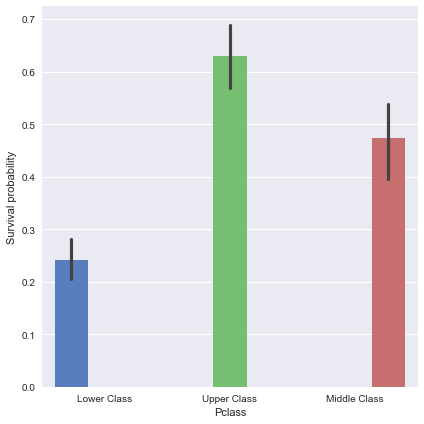

In [79]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Pclass", data=data,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability")

The graphs above so that whilst the lower class had more passengers, than all classes, and more survivors than the middle class, the lower class had the lowest survival rate. The Upper Class passengers had the highest survival rate

### Hypothesis Test
For this test I will be using the chi-sqaure test for independence

In [80]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print("Chi square test {}".format(chi2))
print("P value {}".format(p))

Chi square test 102.88898875696056
P value 4.549251711298793e-23


As the P-value is less than .05 we have to reject null hypothesis and conclude that Class has effect on survival rate.

## 5.4 Which age group is more likely to survive?
### Hypothesis
The hypothesis for this question is that the age group does impact the chances of survival

H0 = Age Group has no impact on survivability

HA = Age Group does impact the chances of survivabily

### Distribution of Age Groups

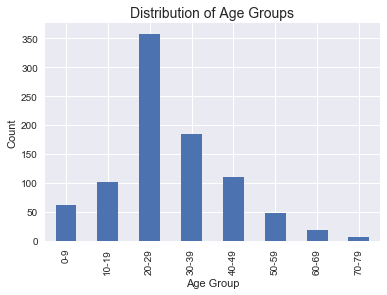

In [84]:
data.groupby(['ageGroups']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

We observe from the above figure that majority of the passengers we between 20 and 29 years age

### Proportion of survivors by age group

In [85]:
print(data.groupby(['ageGroups']).Survived.mean())

ageGroups
0-9      0.612903
10-19    0.401961
20-29    0.315642
30-39    0.454054
40-49    0.354545
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64


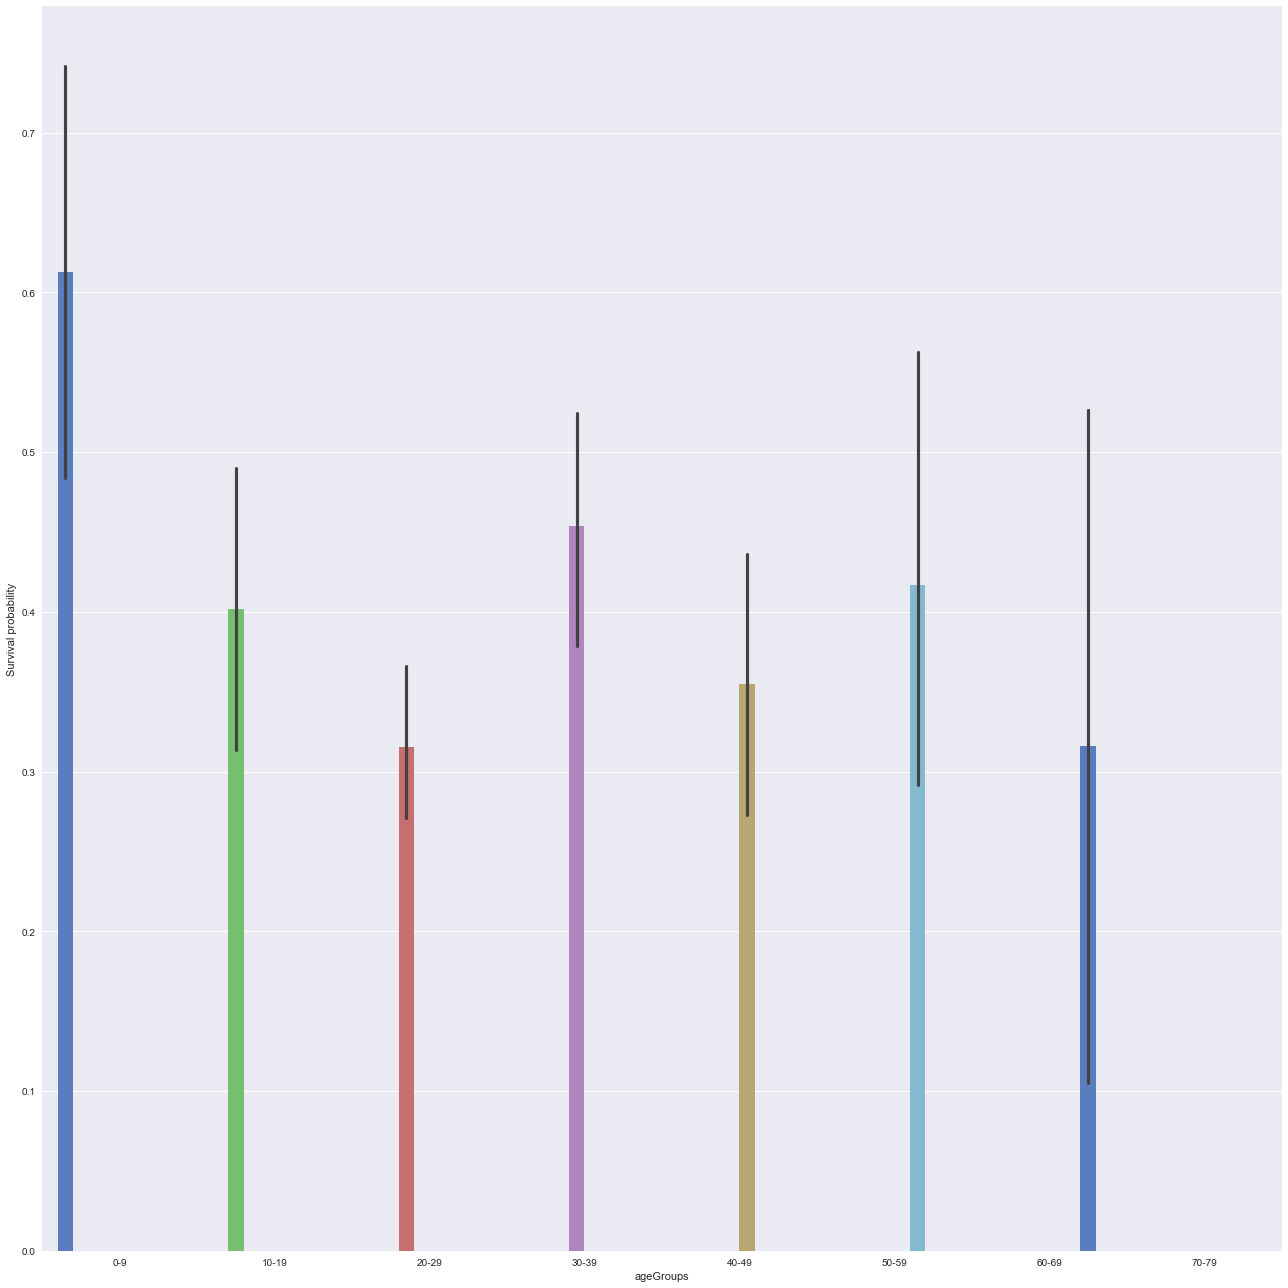

In [87]:
g = sns.factorplot(x="ageGroups", y="Survived", hue="ageGroups", data=data,
                   size=18, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability")

When looking at proportions and percentages of survivors per age group, initially I was suprised by the results, until I thought that this analysis should take into consideration the gender / sex of the passengers as well.

In [89]:
print(data.groupby(['Sex','ageGroups']).Survived.mean())

Sex     ageGroups
female  0-9          0.633333
        10-19        0.755556
        20-29        0.681034
        30-39        0.855072
        40-49        0.687500
        50-59        0.888889
        60-69        1.000000
male    0-9          0.593750
        10-19        0.122807
        20-29        0.140496
        30-39        0.215517
        40-49        0.217949
        50-59        0.133333
        60-69        0.133333
        70-79        0.000000
Name: Survived, dtype: float64


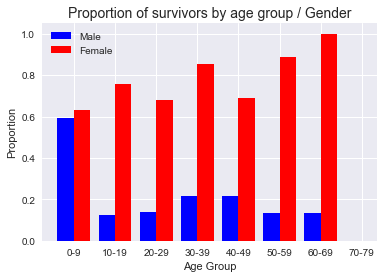

In [98]:
male_data = data[data.Sex == "male"].groupby('ageGroups').Survived.mean().values
female_data = data[data.Sex == "female"].groupby('ageGroups').Survived.mean().values
ax = plt.subplot()
male_plt_position = np.array(range(len(ageGroups)))
female_plt_position = np.array(range(len(ageGroups)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks([0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2],  ageGroups)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

After relooking at the proportion of survivors by age group and gender, the data supports notion of women and children to be given preferential treatment over men. The plot "Proportion of survivors by age group / gender", shows that children (0-9 years old, male and female) and women (all ages) had a much higher proportion of survivors. This supports the notion of the seats in the lifeboats been given to Women and Children first.

### Hypothesis Test
For this test I will be using the chi-sqaure test for independence

In [99]:
table = pd.crosstab([data['Survived']], data['ageGroups'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print("Chi square test {}".format(chi2))
print("P value {}".format(p))

Chi square test 29.538946359010232
P value 0.00011534393309172624


As the P-Value is less than 0.05 the probability of that the age group will impact the chances of survival is high. Therefore  we can reject the null hypothesis.

# 6. Conclusion

In [101]:
print(nanAge.groupby('Sex').size())

Sex
female     53
male      124
dtype: int64


We see that the dataset has 53 rows for female and 124 rows for males where the age is null. So we had two options to clean these missing age problem
- Deleting all rows with missing age. This would hamper the accuracy of analysis based on gender. But the analysis based on age would be more accurate as we are not inserting dummy age for the missing age rows.
- Generating age based on the average of ages. But this has the risk of creating skew in the age analysis. 